In [318]:
import pandas as pd # Pandas is used for data manipulation
import numpy as np # Use numpy to convert to arrays
from sklearn.model_selection import train_test_split # Using Skicit-learn to split data into training and testing sets
from sklearn.linear_model import LinearRegression
from sklearn.tree import export_graphviz # Import tools needed for visualization
import pydot
import matplotlib.pyplot as plt # Import matplotlib for plotting and use magic command for Jupyter Notebooks
from matplotlib import style
from datetime import datetime
import csv
from sklearn import metrics # Model Evaluation
import seaborn as sb # Import Seaborn for statistical visualizations

df = pd.read_csv('Data\\Y2EOL_Data.csv')

df = df.drop('PART', axis = 1) # Remove the part numbers from the features; axis 1 refers to the columns
df = df.drop('Vendor', axis = 1) # Remove the vendors from the features
df = df.drop('PL Name', axis = 1) # Remove the product lines from the features

labels = list(df.columns)

df = np.array(df)

row_index = 0

while row_index < len(df):
    intro_index = labels.index("INTRO_DATE (YRS SINCE 1980)")
    obsolete_index = labels.index("ACTUAL_OBSOLESCENCE_DATE (YRS SINCE 1980)")
    row = df[row_index]
    if row[intro_index] > row[obsolete_index]: # if the introduction date is later than the obsolescence date
        df = np.delete(df,row_index,axis=0)
    else:
        row_index += 1

print(df.shape)

df = pd.DataFrame(data=df,columns=labels) # 1st row as the column names

(951, 5)


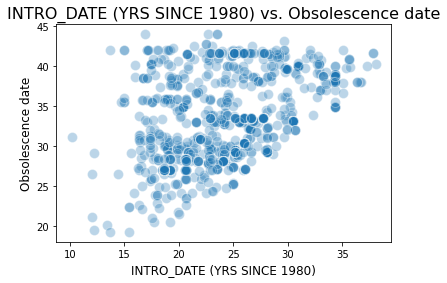

In [319]:
# introduction date vs. obsolescence date

x_var = df[['INTRO_DATE (YRS SINCE 1980)']]
x_label = 'INTRO_DATE (YRS SINCE 1980)'
filename = 'Visuals\\Y2EOL_intro_obsolete.png'

plt.scatter(x = x_label, y = 'ACTUAL_OBSOLESCENCE_DATE (YRS SINCE 1980)', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title(x_label + ' vs. Obsolescence date', fontsize = 16)
plt.ylabel('Obsolescence date', fontsize = 12)
plt.xlabel(x_label, fontsize = 12)

plt.savefig(filename)

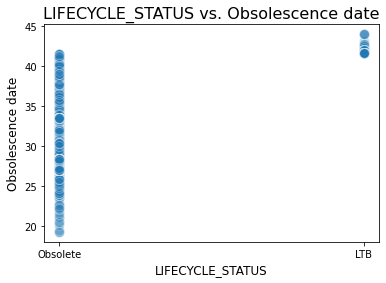

In [320]:
# lifecycle_status vs. obsolescence date

x_var = df[['LIFECYCLE_STATUS']] 
x_label = 'LIFECYCLE_STATUS'
filename = 'Visuals\\Y2EOL_lifecycle_obsolete.png'

plt.scatter(x = x_label, y = 'ACTUAL_OBSOLESCENCE_DATE (YRS SINCE 1980)', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title(x_label + ' vs. Obsolescence date', fontsize = 16)
plt.ylabel('Obsolescence date', fontsize = 12)
plt.xlabel(x_label, fontsize = 12)

plt.savefig(filename)

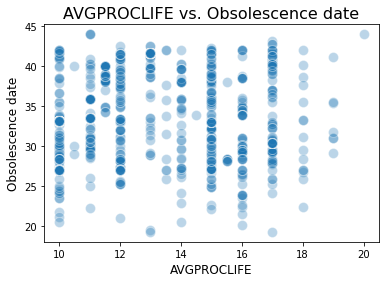

In [321]:
# average procurement life vs. obsolescence date

x_var = df[['AVGPROCLIFE']] 
x_label = 'AVGPROCLIFE'
filename = 'Visuals\\Y2EOL_avgproclife_obsolete.png'

plt.scatter(x = x_label, y = 'ACTUAL_OBSOLESCENCE_DATE (YRS SINCE 1980)', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title(x_label + ' vs. Obsolescence date', fontsize = 16)
plt.ylabel('Obsolescence date', fontsize = 12)
plt.xlabel(x_label, fontsize = 12)

plt.savefig(filename)

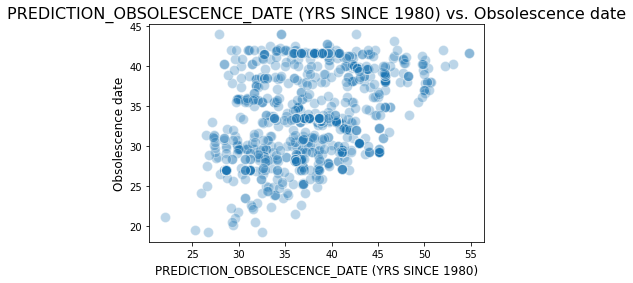

In [322]:
# existing prediction vs. obsolescence date

x_var = df[['PREDICTION_OBSOLESCENCE_DATE (YRS SINCE 1980)']] 
x_label = 'PREDICTION_OBSOLESCENCE_DATE (YRS SINCE 1980)'
filename = 'Visuals\\Y2EOL_prediction_obsolete.png'

plt.scatter(x = x_label, y = 'ACTUAL_OBSOLESCENCE_DATE (YRS SINCE 1980)', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title(x_label + ' vs. Obsolescence date', fontsize = 16)
plt.ylabel('Obsolescence date', fontsize = 12)
plt.xlabel(x_label, fontsize = 12)

plt.savefig(filename)

R-Squared: 0.21510368257237034


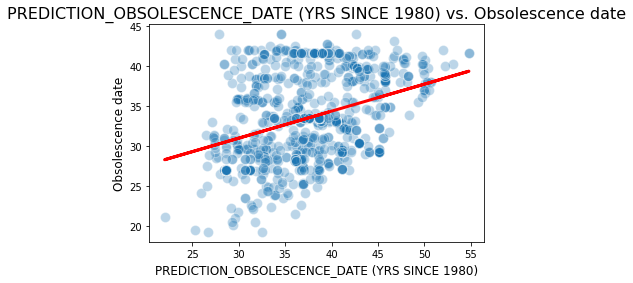

In [323]:
# simple (univariate) linear regression

x_var = df[['PREDICTION_OBSOLESCENCE_DATE (YRS SINCE 1980)']] 
y_var = df['ACTUAL_OBSOLESCENCE_DATE (YRS SINCE 1980)'] # dependent variable

# 80% is for training, 20% is for testing
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size = 0.2, random_state = 42)

lr = LinearRegression() # create the linear regression model
lr.fit(x_train, y_train) # fit the model to the training data

yhat = lr.predict(x_test) # predict the obsolescence date

slr_slope = lr.coef_ # coefficient of the linear regression model
slr_intercept = lr.intercept_ # intercept of the linear regression model

plt.scatter(x = x_label, y = 'ACTUAL_OBSOLESCENCE_DATE (YRS SINCE 1980)', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.plot(x_var, slr_slope*x_var + slr_intercept, color = 'r', linewidth = 3)
plt.title(x_label + ' vs. Obsolescence date', fontsize = 16)
plt.ylabel('Obsolescence date', fontsize = 12)
plt.xlabel(x_label, fontsize = 12)

filename = 'Visuals\\Y2EOL_prediction_obsolete_fit.png'
plt.savefig(filename)

print('R-Squared: ' + str(lr.score(x_test, y_test)))

Intercept:  23.4432467902528
Coefficients:
R squared: 15.45
Mean Absolute Error: 3.963488326290275
Mean Square Error: 22.723786449617055
Root Mean Square Error: 4.766947288319544
Standard Deviation: 4.76186668615354
6.81% of the predictions fall within 0.5 years of the ground truths.


'\nerrors = pd.DataFrame(data=errors,columns=[\'Errors\']).astype(float) # 1st row as the column names)\n\n#df[row.hist(bins=11), edgecolor, grid]\nstd = errors.std(axis = 0, skipna = True, ddof=0)\nprint(type(std))\nprint("Standard Deviation: " + str(std))\n\nhist = errors.hist(bins=15)\n\n#mape = 100 * (errors / y_test) # Calculate mean absolute percentage error (MAPE)\n#accuracy = 100 - np.mean(mape) # Calculate and display accuracy\n#print(\'Accuracy:\', round(accuracy, 2), \'%.\')\n'

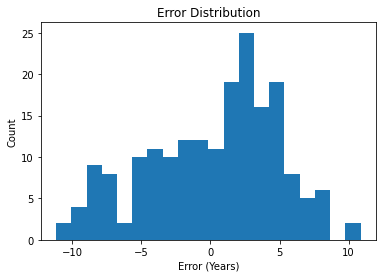

In [324]:
# multiple (multivariate) linear regression

x = df[['INTRO_DATE (YRS SINCE 1980)','PREDICTION_OBSOLESCENCE_DATE (YRS SINCE 1980)']]
y = df['ACTUAL_OBSOLESCENCE_DATE (YRS SINCE 1980)']

# 80% of dataset is for training, 20% is for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

mlr = LinearRegression() # create the Multiple Linear Regression model
mlr.fit(x_train, y_train) # train the model

# Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

y_pred_mlr= mlr.predict(x_test) # predict the test values

mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr}) # actual value and the predicted value

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr) # How much of the input data falls on the regression line
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr) # Absolute difference between actual and predicted values
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr)) # Average of the squared differences

print('R squared: {:.2f}'.format(mlr.score(x,y)*100)) # Root of the mean squared error
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

y_pred_mlr = np.array(y_pred_mlr)
y_test = np.array(y_test)

errors = y_pred_mlr - y_test # calculating error

std = errors.std()
print("Standard Deviation: " + str(std))

threshold = 0.5
count = 0
for error in errors:
    if abs(error) <= threshold:
        count += 1

thres_percentage = count / len(errors) * 100.0
print(str(round(thres_percentage,2)) + "%" + " of the predictions fall within " + str(threshold) + " years of the ground truths.")

plt.hist(errors,bins=20)
plt.xlabel('Error (Years)')
plt.ylabel('Count')
plt.title('Error Distribution')

In [325]:
def floatHourToTime(fh):
    hours, hourSeconds = divmod(fh, 1)
    minutes, seconds = divmod(hourSeconds * 60, 1)
    return (
        int(hours),
        int(minutes),
        int(seconds * 60),
    )

def floatsToDates(values):

    values += 80
    values *= 365.25
    values
    formatted_values = np.copy(values).astype('str')

    for i in range(0,len(values)):
        excel_date = values[i]
        dt = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + int(excel_date) - 2)
        hour, minute, second = floatHourToTime(excel_date % 1)
        dt = dt.replace(hour=hour, minute=minute, second=second)
        dt = str(dt).split(" ")
        del dt[-1]
        formatted_values[i] = dt[0]

    return formatted_values

copy_predictions = np.copy(y_pred_mlr)
copy_actuals = np.copy(y_test)

x_test = np.array(x_test)
y_pred_mlr = np.array(y_pred_mlr)
y_test = np.array(y_test)

x_test = x_test.tolist()
formatted_predictions = floatsToDates(y_pred_mlr).tolist()
formatted_actuals = floatsToDates(y_test).tolist()

try:
    labels.remove("AVGPROCLIFE")
    labels.remove("LIFECYCLE_STATUS")
    labels.remove("ACTUAL_OBSOLESCENCE_DATE (YRS SINCE 1980)")
except:
    print("Columns already removed.")

labels.append("PREDICTION")
labels.append("GROUND_TRUTH")

for row_index in range(0,len(x_test)): #for each row, append the data value
    x_test[row_index].append(formatted_predictions[row_index])
    x_test[row_index].append(formatted_actuals[row_index])

# name of csv file
filename = "Data\\Y2EOL_Predictions_LIR.csv"

# writing to csv file
with open(filename, 'w') as csvfile: 
    # creating a csv writer object
    csvwriter = csv.writer(csvfile,lineterminator='\n')

    # writing the fields 
    csvwriter.writerow(labels) 

    # writing the data rows 
    csvwriter.writerows(x_test)

Text(0.5, 1.0, 'Actual and Predicted Values')

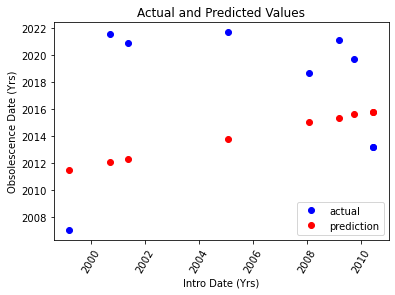

In [326]:
'''
INTRODUCTION DATE IS THE X COORDINATE, THE Y COORDINATE IS THE PREDICTION & ACTUAL
Y COORDINATE CAN BE ANY FORMAT AS LONG AS IT'S CONSISTENT
'''

def year_format(a):
    a += 1980
    return a

x_test = np.array(x_test)
x_test = x_test[0:9,:]
intro_dates = x_test[:,labels.index('INTRO_DATE (YRS SINCE 1980)')]

intro_dates = intro_dates.astype(float)
intro_dates = year_format(intro_dates)
actuals = year_format(copy_actuals)
predictions = year_format(copy_predictions)

# Plot the actual values
plt.plot(intro_dates, actuals[0:9], 'ro', label = 'actual', color = 'blue')
# Plot the predicted values
plt.plot(intro_dates, predictions[0:9], 'ro', label = 'prediction', color = 'red')
plt.xticks(rotation = '60')
plt.legend()
# Graph labels
plt.xlabel('Intro Date (Yrs)')
plt.ylabel('Obsolescence Date (Yrs)')
plt.title('Actual and Predicted Values')